##### 2. Simple deconvolution with LM13

■ Referenec cell types
1. Neutrophils
2. Monocytes
3. B cells
4. CD8 T cells
5. CD4 T cells
6. NK cells
7. Eosinophils
8. Basophils
9. Kupffer
10. Hepatocytes
11. Cholangiocytes
12. Stellate
13. LSEC

In [1]:
Base_dir = 'C:/github/LiverDeconv' # cloning repository

import sys
sys.path.append(Base_dir)
import liver_deconv

import pandas as pd

***
##### ① load data

In [2]:
# deconvolution target
df_mix = pd.read_csv(Base_dir+'/data/mix_processed.csv',index_col=0)
df_mix

,ANIT_1,ANIT_2,ANIT_3,ANIT_4,APAP_1,APAP_11,APAP_2,APAP_4,APAP_6,APAP_8,...,MDA_8,TAA_1,TAA_3,TAA_6,TAA_7,TAA_8,GAL_2,GAL_4,GAL_7,GAL_8
0610005C13Rik,11.875867,12.148424,11.252824,12.411776,11.733585,11.068134,11.748217,11.856797,12.010466,11.216230,...,12.134986,10.641326,10.482294,10.242923,10.101400,9.562121,9.941478,8.431683,7.700966,8.962926
0610009B22Rik,8.734242,8.457720,8.184438,8.506085,7.542759,8.233699,8.699826,8.748106,8.434342,7.651400,...,8.247180,7.936489,8.039019,7.926510,7.985361,7.755954,8.767225,8.663929,8.546301,8.989601
0610010F05Rik,6.490900,6.421802,5.806085,6.462369,5.565017,6.059207,5.922221,5.990138,5.467135,5.755073,...,6.552560,6.950840,6.120020,6.206200,6.356350,6.086378,4.909432,6.207227,6.382519,6.357380
0610010K14Rik,8.564556,8.673014,8.348932,8.224936,9.066347,8.904317,8.386174,8.778923,8.426116,9.441442,...,8.122928,8.779766,9.291585,9.132055,9.200938,9.173803,9.273967,8.512630,8.407845,8.454941
0610012G03Rik,8.097187,7.933714,7.698964,7.900242,8.162186,7.959631,7.644485,7.770003,8.080504,8.389386,...,7.740478,8.486990,8.506687,7.844173,7.849986,7.853950,8.150181,8.108420,7.913200,8.247160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt-Nd4l,15.213411,14.090892,13.698860,14.687603,14.154671,14.378480,14.361852,14.518766,14.687603,14.177631,...,14.428075,15.130819,14.893630,14.512758,15.034191,14.518766,13.838802,14.549229,14.791879,14.658512
mt-Nd5,15.711959,15.368110,15.677444,15.885260,15.885260,15.831479,15.590643,15.444818,15.677444,15.792998,...,16.215327,15.831479,15.711959,15.444818,16.096565,15.274954,15.069695,15.792998,15.815069,15.815069
mt-Nd6,10.048224,8.644268,8.953467,8.527458,9.526381,9.416154,10.354006,10.512462,8.401129,9.273151,...,8.885103,9.116829,9.673483,9.604136,8.745207,9.636812,10.559120,8.630513,10.156484,10.444071
mt-Rnr1,13.035846,12.501913,12.585965,12.210048,12.244025,11.855817,13.088120,13.743162,13.182495,11.372156,...,11.464085,12.385989,12.874538,13.079926,13.780092,12.964636,12.308852,13.806046,13.998165,13.651564


In [3]:
# reference
df_ref = pd.read_csv(Base_dir+'/data/ref_13types.csv',index_col=0)
df_ref

,NK_GSE114827_1,NK_GSE114827_2,NK_GSE114827_3,NK_GSE103901_1,NK_GSE103901_2,NK_GSE103901_3,NK_GSE103901_4,NK_GSE103901_5,B_GSE84878_1,B_GSE84878_2,...,LSEC_GSE120281_1,LSEC_GSE120281_2,LSEC_GSE120281_3,LSEC_GSE120282_1,LSEC_GSE120282_2,LSEC_GSE120282_3,LSEC_GSE135789_1,LSEC_GSE135789_2,LSEC_GSE135789_3,LSEC_GSE135789_4
mgi,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,11.216826,23.474148,0.987152,15.364877,31.139537,22.703545,20.156833,29.162144,0.612939,1.192251,...,12.298976,76.916281,41.270084,28.856090,6.702005,17.255757,28.317989,33.905790,4.296730,7.443342
0610006L08Rik,0.000000,0.000000,0.000000,0.000000,0.000000,2.532700,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0610009B22Rik,3801.734228,3838.271735,590.980263,1673.625997,1265.782913,660.394232,596.272184,641.598858,424.297827,489.444747,...,139.429684,64.162805,103.716779,113.015607,106.637527,214.289784,849.609673,1282.319472,852.775792,1173.783288
0610009E02Rik,38.492335,26.822363,9.531486,31.225440,5.380941,25.955692,27.520060,22.481986,30.104838,24.581738,...,32.408879,48.411034,51.805864,12.867085,22.047564,14.648481,9.014010,34.387327,18.025384,25.093965
0610009L18Rik,260.189214,144.910984,115.846603,639.627003,664.538873,333.376854,357.646002,390.423509,71.599094,72.398348,...,27.368506,19.615761,17.567439,17.163154,11.899047,23.225588,145.807093,189.147226,166.073179,112.401889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n-R5s41,0.000000,0.000000,0.000000,0.000000,56.173842,0.000000,126.690794,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,174.691917,0.000000,0.000000,0.000000,0.000000,0.000000
n-R5s65,0.000000,0.000000,0.000000,0.000000,58.420842,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,259.503070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
n-R5s7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.690794,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


***
##### ② Preparation of cell type-specific expression matrix
- Detect differentially expressed genes
- Up to 50 genes / cell with an absolute fold change greater than 1.5 for the second highest cell type.


(11588, 57)
(51463, 113)
log2 conversion
quantile normalization
drop nan
narrowd gene number : 11555
not enough genes picked up
not enough genes picked up
not enough genes picked up
not enough genes picked up
not enough genes picked up
not enough genes picked up
signature genes : 503


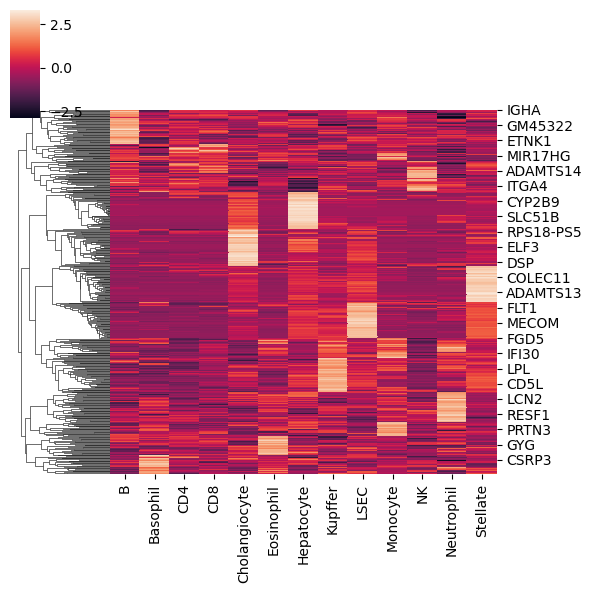

,B,Basophil,CD4,CD8,Cholangiocyte,Eosinophil,Hepatocyte,Kupffer,LSEC,Monocyte,NK,Neutrophil,Stellate
1810014B01RIK,6.894459,9.558404,6.307025,6.895476,5.230195,5.404626,6.899987,7.073296,3.944545,5.681578,6.401633,0.000000,5.134967
2010003K11RIK,0.000000,0.000000,0.000000,0.000000,3.978261,0.000000,9.132970,0.000000,0.000000,0.000000,0.000000,0.000000,0.390510
2310015A16RIK,0.000000,0.000000,0.000000,0.000000,3.389768,0.000000,10.271526,0.680040,1.057403,0.000000,0.000000,0.000000,1.562233
2510016D11RIK,3.686890,0.000000,4.928871,4.659895,2.962295,5.844088,5.259374,0.610059,3.011108,7.644206,2.240240,4.725220,2.633859
2610301B20RIK,6.451084,8.773068,5.564707,5.838959,6.495640,5.824767,7.129563,6.327372,5.900469,5.890122,6.825659,4.753729,6.333058
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZFP362,10.409078,7.919830,8.354839,8.851777,8.006152,8.370806,5.741820,8.200334,8.049678,8.157505,7.011759,4.616942,8.105618
ZFP385A,6.856357,8.287148,2.799937,4.319394,6.653858,6.352771,8.411360,7.922977,4.964929,10.180474,1.511074,6.029758,8.378901
ZFP512,8.248966,8.290136,8.260310,7.816556,8.387329,7.991780,6.598509,8.489771,8.016259,7.727124,10.320395,7.895414,8.526186
ZFP618,0.000000,0.580594,0.442783,0.000000,10.582523,0.000000,2.013910,2.581380,6.038260,2.106398,0.000000,3.364455,3.605580


In [4]:
dat = liver_deconv.LiverDeconv()
dat.set_data(df_mix=df_mix, df_all=df_ref)
dat.pre_processing(do_ann=False,ann_df=None,do_log2=True,do_quantile=True,do_trimming=False,do_drop=True)
dat.narrow_intersec()
dat.create_ref(sep="_",number=50,limit_CV=10,limit_FC=1.5,log2=False,verbose=True,do_plot=True)

final_ref = dat.final_ref
final_ref

***
##### ③ Conduct deconvolution with Elastic Net
- Some samples were excluded from analysis.

0 rows are removed
0 rows are removed
number of used genes = 503
fitting method : ElasticNet


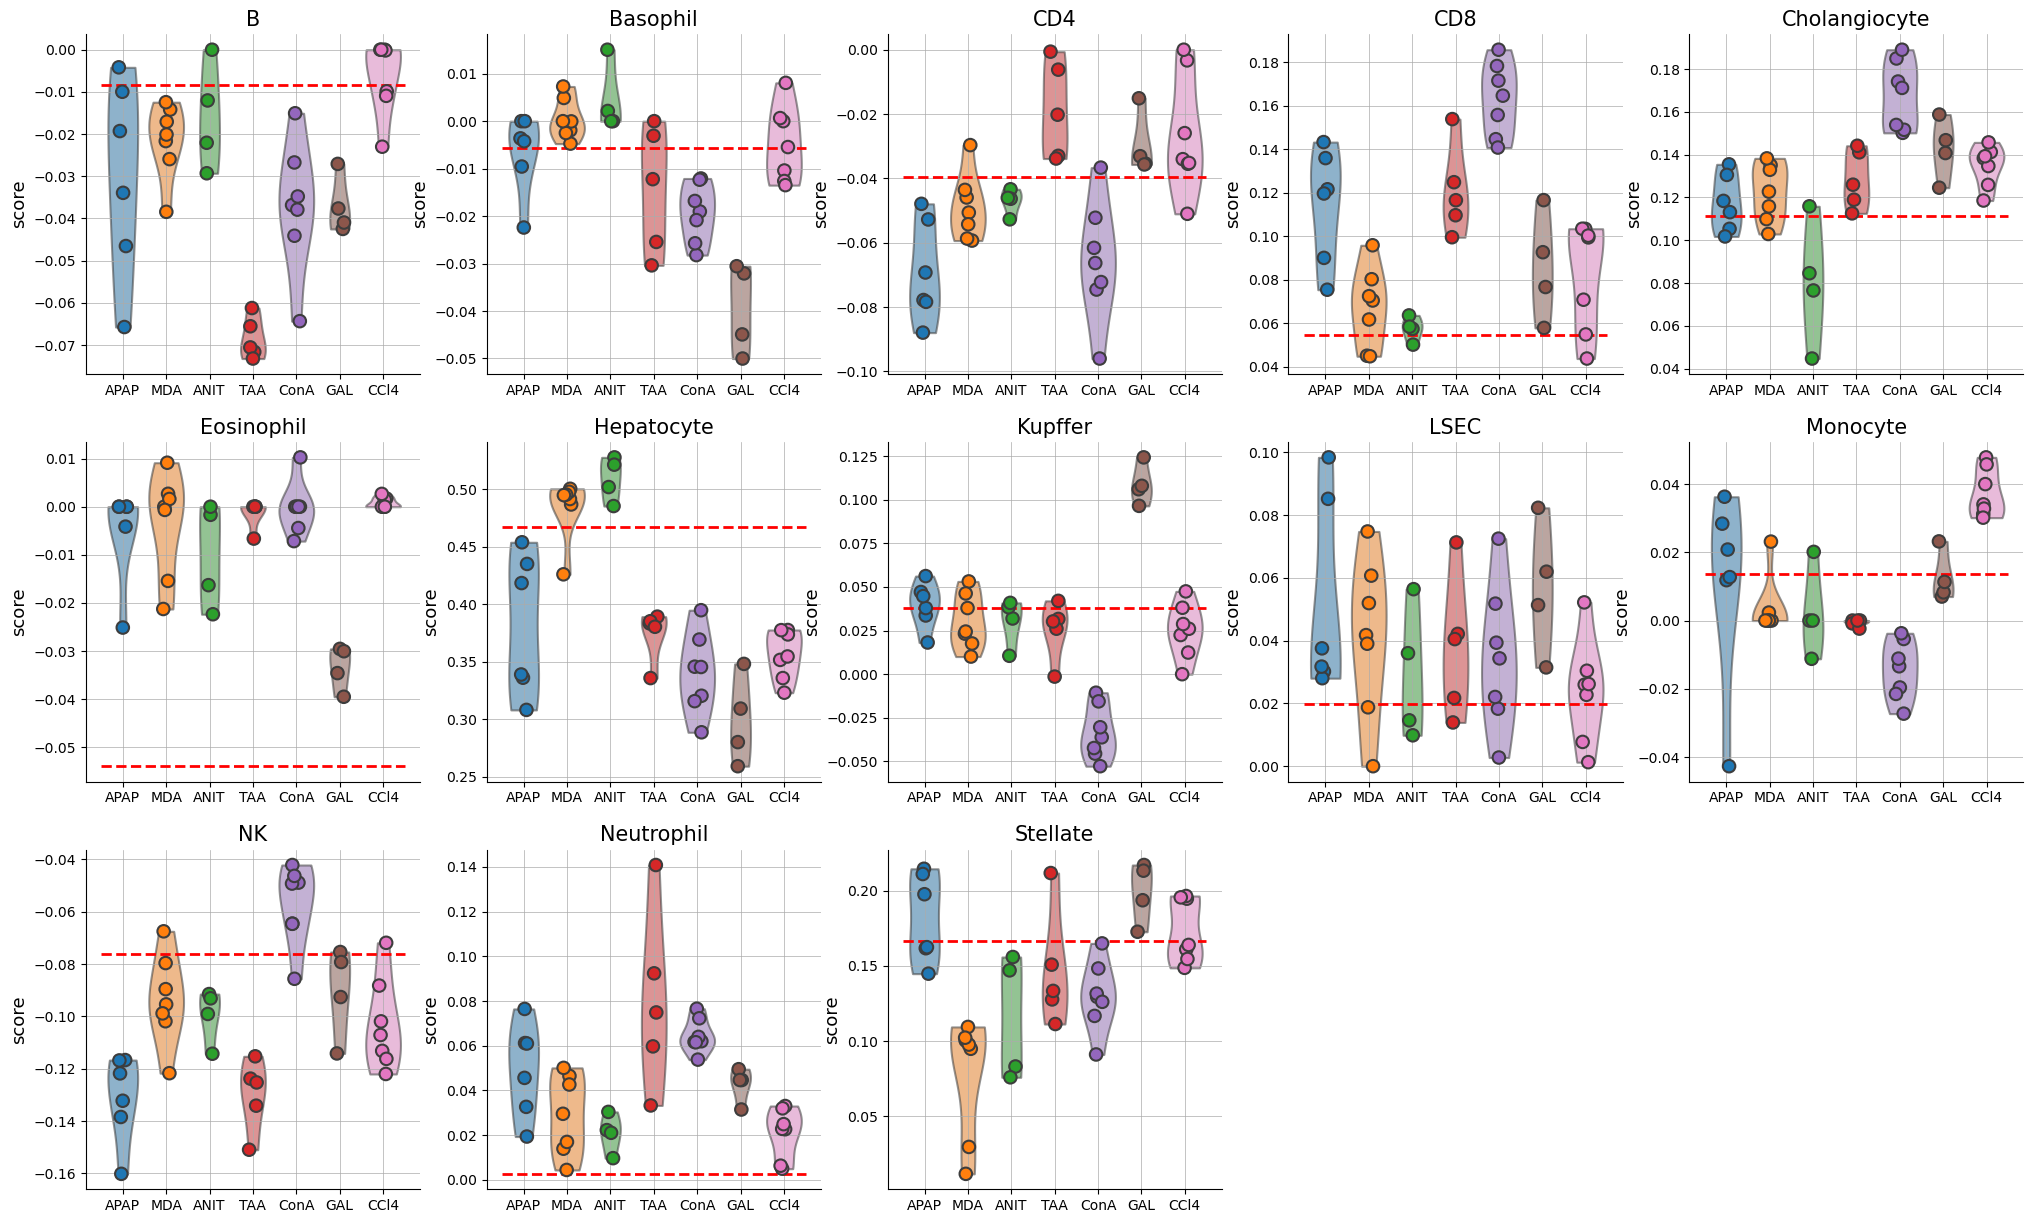

In [5]:
dat.do_fit()
dat.summarize(remove_list=["CIV_7","CIV_8","CIP_7","CIP_8"],
                  sort_index=["APAP","MDA","ANIT","TAA","ConA","GAL","CCl4"],
                  x_doc="",y_doc="score",ctrl="Ctrl",row_n=3,col_n=5,z_score=False)
res = dat.get_res()

***
##### ④ Validation with the true value (measured by flow cytometry)
- We evaluated for 4 cell types (neutrophils, monocytes, NK cells, and eosinophils).
- It is also possible to merge multiple cell types and evaluate. For example ```dec_names=[["CD4","CD8"]], val_names=[["abT"]]``` allows to evaluate whether the sum of the proportions of CD4+T cells and CD8+T cells  is consistent with the αβT cells (measured by FACS).

standardz population control
original : 57
after removing : 53
standardz population control
----------


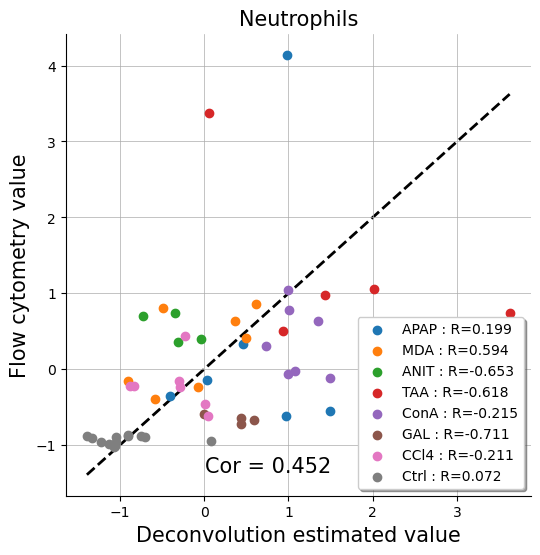

----------


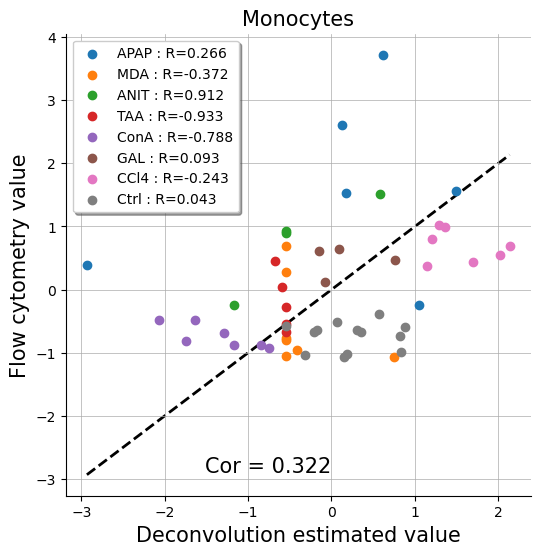

----------


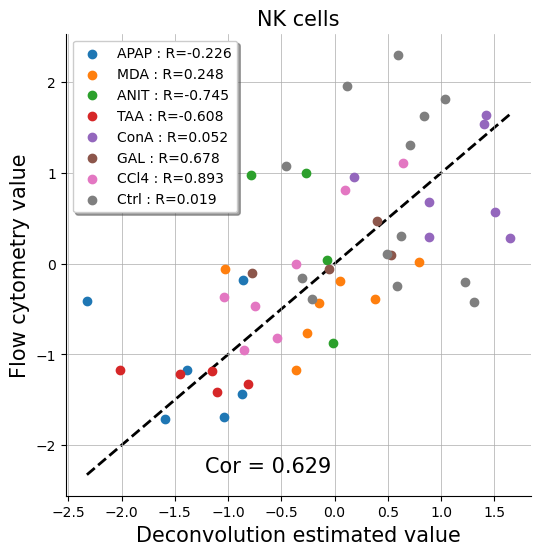

----------


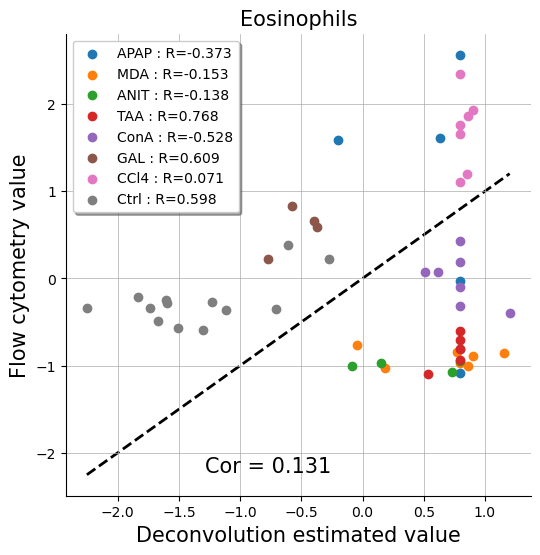

In [6]:
from Evaluation import evaluator

val_df = pd.read_csv('C:/github/LiverDeconv/Data/facs_true_population.csv',index_col=0)

ev = evaluator.Evaluator()
ev.set_deconv_res(res_df=res,z_score=True)
ev.remove_samples(remove_list=["CIV_7","CIV_8","CIP_7","CIP_8"])
ev.set_validation_ref(val_df=val_df)
ev.process_validation_ref(z_score=True)

ev.evaluate(dec_names=[["Neutrophil"]],
            val_names=[["Neutrophil"]],sort_index=["APAP","MDA","ANIT","TAA","ConA","GAL","CCl4","Ctrl"],title="Neutrophils",do_plot=True,simple=False,eval_all=False,dpi=100)
ev.evaluate(dec_names=[["Monocyte"]],
            val_names=[["Monocyte"]],sort_index=["APAP","MDA","ANIT","TAA","ConA","GAL","CCl4","Ctrl"],title="Monocytes",do_plot=True,simple=False,eval_all=False,dpi=100)
ev.evaluate(dec_names=[["NK"]],
            val_names=[["NK"]],sort_index=["APAP","MDA","ANIT","TAA","ConA","GAL","CCl4","Ctrl"],title="NK cells",do_plot=True,simple=False,eval_all=False,dpi=100)
ev.evaluate(dec_names=[["Eosinophil"]],
            val_names=[["Eosinophil"]],sort_index=["APAP","MDA","ANIT","TAA","ConA","GAL","CCl4","Ctrl"],title="Eosinophils",do_plot=True,simple=False,eval_all=False,dpi=100)